# Parameters To Test:
* AOM Intensity 
* Microwave duration 
* Pump \ Image length? 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PyQt5.QtCore import QCoreApplication, QTimer, Qt
from PyQt5.QtNetwork import QTcpSocket

import os

os.chdir(r"D:\NanoDiamond\PulseSequencer")

from IPython.display import display

from Interfaces.dataSaver import dataSaver

from Data.pulseConfiguration import pulseConfiguration
from Data.microwaveConfiguration import microwaveConfiguration
from Data.measurementType import measurementType

from LogicManagers.measurementManager import measurementManager
from LogicManagers.scanManager import scanManager
from LogicManagers import pulseAnalayzer

## Settings

In [2]:
Iterations = 1000000
AOM_max = 1
AOM_min = 0
AOM_step = 0.05

AOM_range = np.arange(AOM_min, AOM_max, AOM_step)

## Configurations

In [3]:
pulseConfig = pulseConfiguration()

pulseConfig.count_duration = 1
pulseConfig.samples_number = 1024
pulseConfig.threshold = 1.6
pulseConfig.iterations = Iterations
pulseConfig.pump_start = 0
pulseConfig.pump_duration = 4
pulseConfig.microwave_start = 5
pulseConfig.microwave_duration = 1
pulseConfig.image_start = 8
pulseConfig.image_duration = 4
pulseConfig.readout_start = 0
pulseConfig.low_voltage_AOM = 0
pulseConfig.high_voltage_AOM = 0.9
pulseConfig.measurement_type = measurementType.RabiPulse

microwaveConfig = microwaveConfiguration(
    trigMode = 0,
    centerFreq=2870,
    power=0)

In [4]:
measurement_manager = measurementManager()
measurement_manager.connectToEverything()

AOM_intensity = 0

pump_intensity = {}
image_intensity = {}

The IP address of rp-f09ded.local is 132.72.13.15
Connecting to red pitaya: 132.72.13.15 1001
connected to pulse blaster
WindFreak is connected


In [5]:
def printAndSaveData(data, AOM_intensity):       
    xLabel = measurement_manager.RabiXAxisLabel
    yLabel = measurement_manager.RabiYAxisLabel

    t_image, y_image = pulseAnalayzer.getOnlyImage(data[xLabel], data[yLabel])
    t_pump, y_pump = pulseAnalayzer.getOnlyPump(data[xLabel], data[yLabel])
    
    pump_intensity[AOM_intensity] = pulseAnalayzer.getIntegraionOfPump(data[xLabel], data[yLabel])
    image_intensity[AOM_intensity] = pulseAnalayzer.getIntegraionOfImage(data[xLabel], data[yLabel])

    plt.plot(t_pump, y_pump, label = "Pump")
    plt.plot(t_image, y_image, label = "Image")
    
    plt.legend()

    plt.xlabel(xLabel)
    plt.ylabel(yLabel)

    plt.show()

In [7]:
printAndSaveData(data, AOM_intensity)

<IPython.core.display.Javascript object>

In [6]:
for AOM_intensity in AOM_range:
    pulseConfig.high_voltage_AOM = AOM_intensity
    data = measurement_manager.startNewRabiPulseMeasurement(pulseConfig, microwaveConfig)
    
    printAndSaveData(data, AOM_intensity)

AOM voltage: 0.0
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2870 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001


<IPython.core.display.Javascript object>

AOM voltage: 0.05
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2870 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
AOM voltage: 0.1
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2870 0 0
new rabi measurement started


KeyboardInterrupt: 

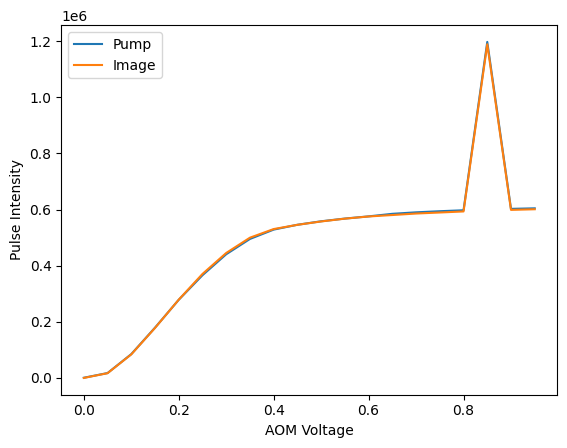

In [9]:
y_label = "Pulse Intensity"
x_label = "AOM Voltage"

plt.plot(pump_intensity.keys(),pump_intensity.values(), label="Pump")
plt.plot(image_intensity.keys(),image_intensity.values(), label="Image")

plt.xlabel(x_label)
plt.ylabel(y_label)

plt.legend()

plt.show()

[1.0, 0.029785284030319388, 0.010508545156408646, 0.005210230547566532, -0.0016297252113480335, -0.012410608292606684, -0.010308623111901158, -0.009112621682588215, -0.003726073699867229, -0.0012041474331332695, 0.0012884619306100188, 0.0013116338147005856, 0.0006848575663942284, 0.007351746282278373, 0.007242344306487987, 0.007711609144343633, 0.007033752706246752, 0.006980031052343229, 0.006043248415732802, 0.005469858595508655, 0.0010268480907856114, 0.0011909978644690658, 0.0014374401788401635, 0.0004474700225633317]


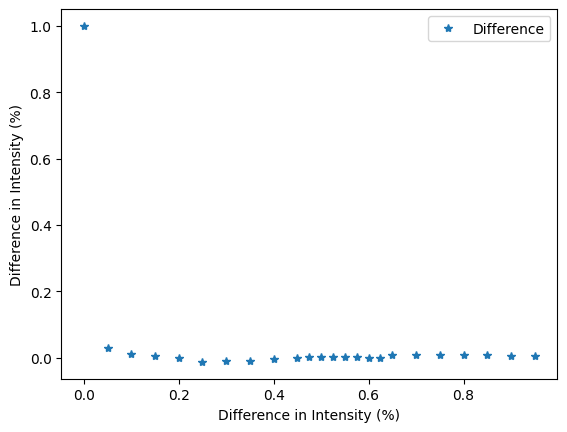

In [15]:
y_label = "Difference in Intensity (%)"
x_label = "AOM Voltage"

diff = [(a - b)/a for a, b in zip(pump_intensity.values(), image_intensity.values())]
print(diff)

plt.plot(pump_intensity.keys(),diff, "*", label="Difference")

plt.xlabel(y_label)
plt.ylabel(y_label)

plt.legend()

plt.show()

AOM voltage: 0.45
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2870 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001


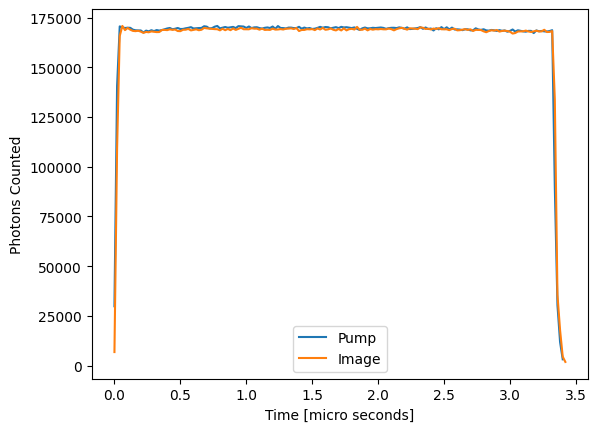

AOM voltage: 0.47500000000000003
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2870 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001


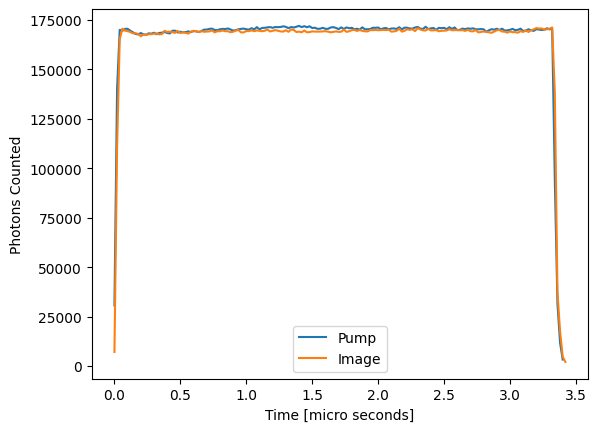

AOM voltage: 0.5
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2870 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001


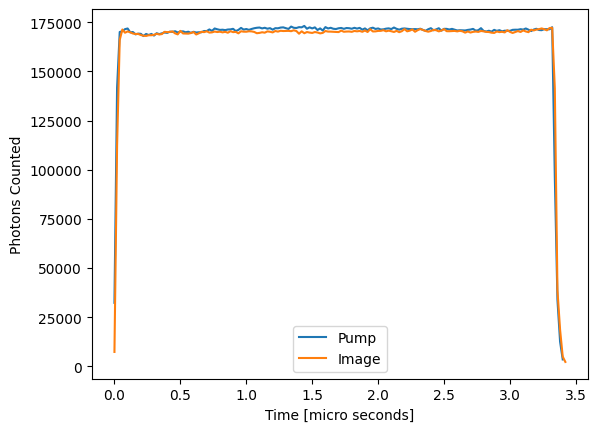

AOM voltage: 0.5250000000000001
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2870 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001


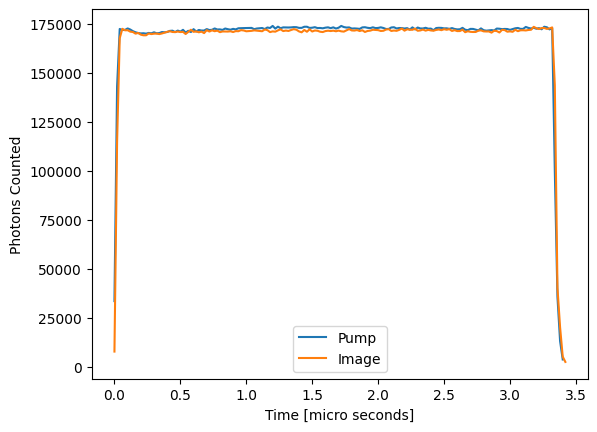

AOM voltage: 0.55
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2870 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001


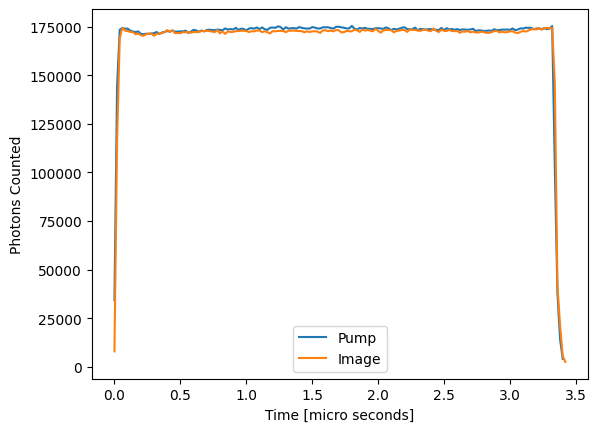

AOM voltage: 0.5750000000000002
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2870 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001


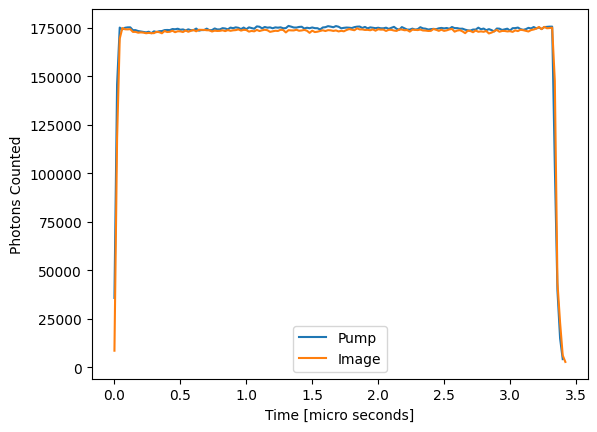

AOM voltage: 0.6000000000000001
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2870 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001


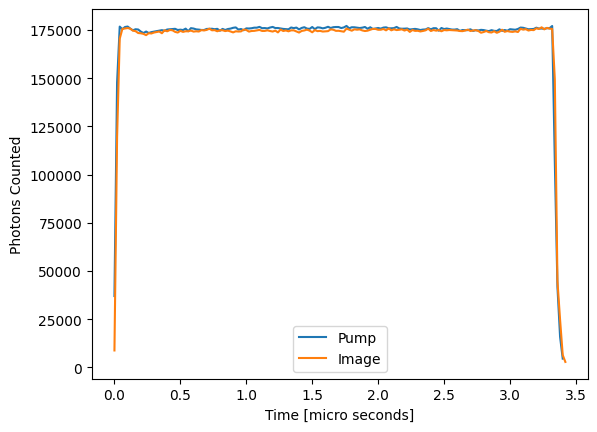

AOM voltage: 0.6250000000000002
Configuration sent to red pitaya
configured pulse blaster
Windfreak Rabi configuration sent: 2870 0 0
new rabi measurement started
recived new data, bytes: 4096
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001


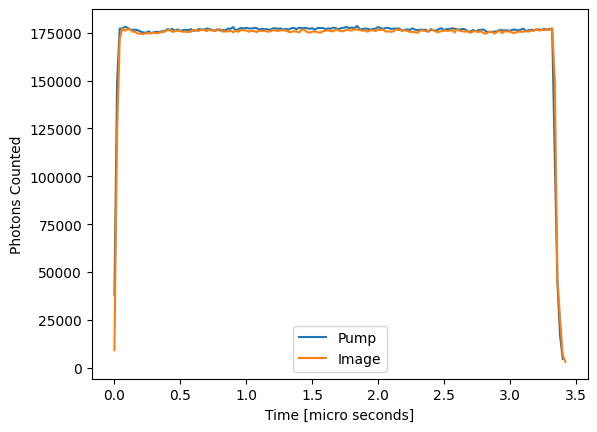

In [13]:
AOM_range = np.arange(0.45, 0.65, 0.025)

for AOM_intensity in AOM_range:
    pulseConfig.high_voltage_AOM = AOM_intensity
    data = measurement_manager.startNewRabiPulseMeasurement(pulseConfig, microwaveConfig)
    
    printAndSaveData(data, AOM_intensity)

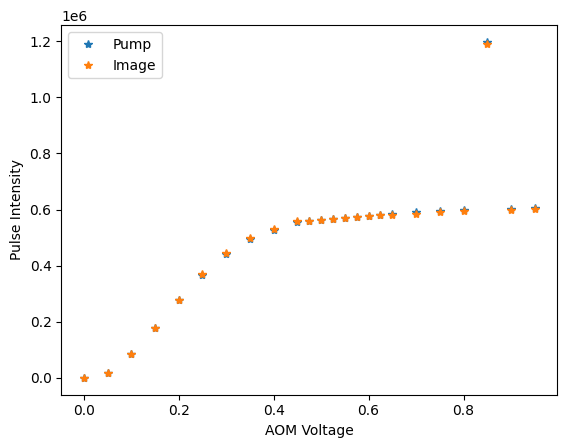

In [17]:
y_label = "Pulse Intensity"
x_label = "AOM Voltage"


plt.plot(pump_intensity.keys(),pump_intensity.values(), "*",label="Pump")
plt.plot(image_intensity.keys(),image_intensity.values(), "*", label="Image")

plt.xlabel(x_label)
plt.ylabel(y_label)

plt.legend()

plt.show()

In [15]:
[pump_intensity[key] for key in AOM_range]

[590401.72,
 593871.19,
 597897.0800000001,
 602093.97,
 607527.25,
 610678.91,
 614659.8400000001,
 618486.4199999999]